## Data Retrieval

#### Importing Packages

In [1]:
import requests
import json
import pandas
import datetime

import matplotlib
from matplotlib import pyplot

import numpy

#### Settings

In [1]:
#this enables depiction of plots
%matplotlib inline

#### Constants

In [3]:
bitcoin_title = 'bitcoin price in USD'
search_volume_title = 'search volume'

### 1. Getting Bitcoin Price Data

In [4]:
#get bitcoin price data via coindesk api
response = requests.get('https://api.coindesk.com/v1/bpi/historical/close.json?start=2011-05-01&end=2017-11-18')
response_as_json = json.loads(response.content)

#transform data into desired shape
bpi = pandas.DataFrame.from_dict(response_as_json)
bpi.drop(['disclaimer', 'time'], axis=1, inplace=True)
bpi.drop(['updated', 'updatedISO'], inplace=True)
bpi = bpi.rename(columns={'bpi': 'bitcoin_price'})
bpi.index.names = ['date']
bpi.index = pandas.to_datetime(bpi.index, format="%Y-%m-%d")

#print first five rows of data
bpi.head()

,bitcoin_price
date,
2011-05-01,3.0331
2011-05-02,3.2000
2011-05-03,3.4100
2011-05-04,3.4061
2011-05-05,3.3330


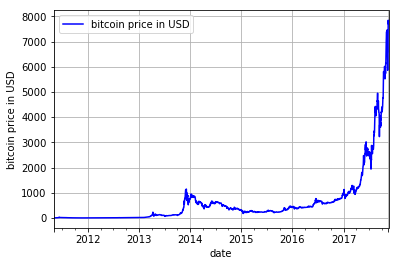

In [5]:
#plot bitcoin price data
ax = bpi.plot(color='b')
ax.grid()
ax.set_ylabel(bitcoin_title)
ax.legend((bitcoin_title,), loc=2)

### 2. Getting Google Trends Data

In [6]:
#get search volume from google trends via preprocessed csv table
google = pandas.read_csv("../csv_data/bitcoin_google_trends.csv", ";")

#transform data into desired shape
google['date'] = pandas.to_datetime(google['date'], format="%d.%m.%y")
google['search_volume'] = google['search_volume'].str.replace(',','.')
google['search_volume'] = google['search_volume'].apply(pandas.to_numeric)
google.set_index('date', inplace=True)

#print first five rows of data
google.head()

,search_volume
date,
2011-05-01,0.704634
2011-05-02,0.493244
2011-05-03,0.493244
2011-05-04,0.422781
2011-05-05,0.493244


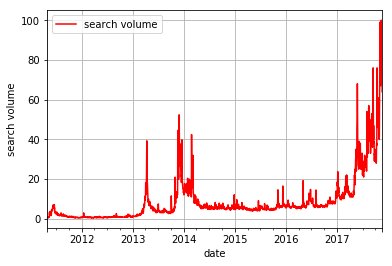

In [7]:
#plot search volume data
ax = google.plot(color='r')
ax.grid()
ax.set_ylabel(search_volume_title)
ax.legend((search_volume_title,), loc=2) #loc 2: upper left

### 3. Merging data

In [8]:
#merge bitcoin price data and google trends data
data = pandas.concat([bpi, google], axis=1)

#print first five rows of data
data.head()

,bitcoin_price,search_volume
date,,
2011-05-01,3.0331,0.704634
2011-05-02,3.2000,0.493244
2011-05-03,3.4100,0.493244
2011-05-04,3.4061,0.422781
2011-05-05,3.3330,0.493244


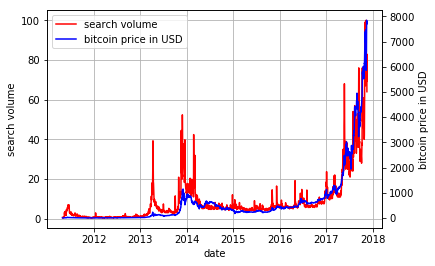

In [9]:
#plot bitcoin price data and search volume data into one figure
fig = matplotlib.pyplot.figure()

ax = fig.add_subplot(111)
ax.grid()
lns1 = ax.plot(data.index, data.search_volume, label = search_volume_title, color ='r')
ax2 = ax.twinx()
lns2 = ax2.plot(data.index, data.bitcoin_price, label = bitcoin_title, color = 'b')

lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=2)

ax.set_xlabel("date")

ax.set_ylabel(search_volume_title)
ax2.set_ylabel(bitcoin_title)

### Rolling Mean

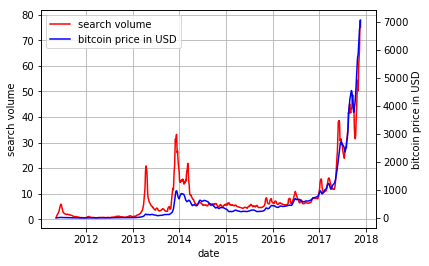

In [10]:
#create rolling mean of data to smooth out data in order to genereate a more readable plot
data_mean = data.rolling(window=15,center=False).mean()

#plot rolling mean of both bitcoin price data and search volume data into one figure
fig = matplotlib.pyplot.figure()
ax = fig.add_subplot(111)
ax.grid()
lns1 = ax.plot(data_mean.index, data_mean.search_volume, label = search_volume_title, color ='r')
ax2 = ax.twinx()
lns2 = ax2.plot(data_mean.index, data_mean.bitcoin_price, label = bitcoin_title, color = 'b')

lns = lns1+lns2
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=2)

ax.set_xlabel("date")

ax.set_ylabel(search_volume_title)
ax2.set_ylabel(bitcoin_title)